In [ ]:
import os
import networkx as nx
import numpy as np
import json
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
%matplotlib inline  

In [ ]:
from networkx.generators.random_graphs import erdos_renyi_graph, barabasi_albert_graph


In [ ]:
# import AnomalousCommunityDetector from parent directory
original_cur_dir = os.getcwd()
os.chdir('..')
#from AnomalyInfusedCommunityStructuredRandomNetworkGenerator.AnomalyInfusedCommunityStructuredRandomNetworkGeneratorAfterCrisis import AnomalyInfusedCommunityStructuredRandomNetworkGenerator
from AnomalyInfusedCommunityStructuredRandomNetworkGenerator.AnomalyInfusedCommunityStructuredRandomNetworkGenerator import AnomalyInfusedCommunityStructuredRandomNetworkGenerator
from AnomalousCommunityDetection.BiPartiteCreator import BiPartiteCreator
from AnomalousCommunityDetection.NetworkSampler import NetworkSampler
from AnomalousCommunityDetection.FeatureExtractor import FeatureExtractor
from AnomalousCommunityDetection.LinkPredictor import LinkPredictor
from AnomalousCommunityDetection.MetaFeatureExtractor import MetaFeatureExtractor
from AnomalousCommunityDetection.MetaFeatureRanker import MetaFeatureRanker
os.chdir(original_cur_dir)

In [ ]:
from ..AnomalyInfusedCommunityStructuredRandomNetworkGenerator.AnomalyInfusedCommunityStructuredRandomNetworkGeneratorAfterCrisis import AnomalyInfusedCommunityStructuredRandomNetworkGenerator
from ..AnomalyInfusedCommunityStructuredRandomNetworkGenerator.AnomalyInfusedCommunityStructuredRandomNetworkGenerator import AnomalyInfusedCommunityStructuredRandomNetworkGenerator

In [ ]:
from AnomalousCommunityDetection.BiPartiteCreator import BiPartiteCreator
from AnomalousCommunityDetection.NetworkSampler import NetworkSampler
from AnomalousCommunityDetection.FeatureExtractor import FeatureExtractor
from AnomalousCommunityDetection.LinkPredictor import LinkPredictor
from AnomalousCommunityDetection.MetaFeatureExtractor import MetaFeatureExtractor
from AnomalousCommunityDetection.MetaFeatureRanker import MetaFeatureRanker

In [4]:
save_dir = 'tests'
test_bpg_save_path = os.path.join(save_dir, 'test_bpg.gml')
test_feats_save_pats = os.path.join(save_dir, 'test_feats.csv')

In [5]:
random_seed = 1

In [6]:
norm_comm_alg = barabasi_albert_graph
anom_comm_alg = erdos_renyi_graph

p_inter = 0.2
k_min = 1
k_max = 1

In [7]:
normal_community_sizes = [10]*45
normal_m = 1

anomalous_community_sizes = [10]*5
anomalous_m = 1

In [8]:
generator = AnomalyInfusedCommunityStructuredRandomNetworkGenerator(
    norm_comm_alg, anom_comm_alg, p_inter, k_min, k_max, random_seed)

In [9]:
G = generator.generate_network(normal_community_sizes, normal_m, anomalous_community_sizes, anomalous_m)

In [10]:
partitons_map = generator.get_partitions()
#partitons_map

In [11]:
partitions_sizes = {k: len(v) for k, v in partitons_map.items()}
partitions_sizes

{'comm001': 12,
 'comm002': 13,
 'comm003': 11,
 'comm004': 11,
 'comm005': 10,
 'comm006': 16,
 'comm007': 13,
 'comm008': 11,
 'comm009': 14,
 'comm010': 11,
 'comm011': 12,
 'comm012': 14,
 'comm013': 15,
 'comm014': 12,
 'comm015': 11,
 'comm016': 11,
 'comm017': 11,
 'comm018': 11,
 'comm019': 13,
 'comm020': 15,
 'comm021': 14,
 'comm022': 11,
 'comm023': 12,
 'comm024': 12,
 'comm025': 11,
 'comm026': 12,
 'comm027': 13,
 'comm028': 13,
 'comm029': 10,
 'comm030': 12,
 'comm031': 13,
 'comm032': 11,
 'comm033': 16,
 'comm034': 12,
 'comm035': 11,
 'comm036': 13,
 'comm037': 10,
 'comm038': 10,
 'comm039': 12,
 'comm040': 11,
 'comm041': 14,
 'comm042': 11,
 'comm043': 14,
 'comm044': 13,
 'comm045': 12,
 'comm046': 10,
 'comm047': 10,
 'comm048': 10,
 'comm049': 10,
 'comm050': 10}

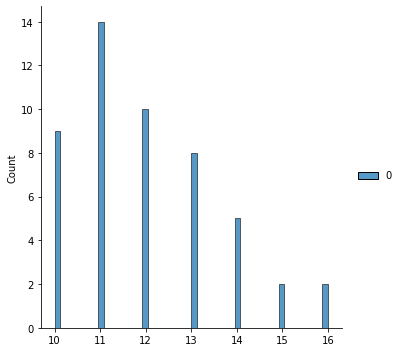

In [12]:
sns.displot(partitions_sizes.values(), bins=50)

In [13]:
from collections import Counter

In [14]:
sorted(list(Counter(partitions_sizes.values()).items()), key=lambda x: x[0])

[(10, 9), (11, 14), (12, 10), (13, 8), (14, 5), (15, 2), (16, 2)]

In [15]:
def _read_partitions_map(partitions_map_path):
    # to read a partitions map dictionary of json file path
    with open(partitions_map_path, 'r', encoding='UTF8') as file:
        return json.load(file)

In [16]:
split = 20
train_set_comms = list(partitons_map.keys())[:split]
test_set_comms = list(partitons_map.keys())[split:]

In [17]:
train_partitions_map = {k:v for k,v in partitons_map.items() if k in train_set_comms}
test_partitions_map = {k:v for k,v in partitons_map.items() if k in test_set_comms}

In [18]:
#train_partitions_map

In [19]:
#test_partitions_map

Create BiPartie Network

In [20]:
BPG_train_generator = BiPartiteCreator(train_partitions_map)
BPG_train = BPG_train_generator.create_bipartite_graph(train_set_comms)
BPG_train_generator.print_properties()

 BiPartite network properties:
	Number of 'Vertex'-partite vertices: 226
	Number of 'Community'-partite vertices: 20
	Total number of vertices: 246
	Total number of edges: 247


In [21]:
BPG_test_generator = BiPartiteCreator(test_partitions_map)
BPG_test = BPG_test_generator.create_bipartite_graph(test_set_comms)
BPG_test_generator.print_properties()

 BiPartite network properties:
	Number of 'Vertex'-partite vertices: 319
	Number of 'Community'-partite vertices: 30
	Total number of vertices: 349
	Total number of edges: 353


In [22]:
nx.write_gml(BPG_test, path=test_bpg_save_path)

In [23]:
#BPG_train.nodes

In [24]:
#BPG_test.nodes

In [25]:
sampler = NetworkSampler('Community', 'Vertex')

In [26]:
train_set_positive_edges, train_set_negative_edge = sampler.sample_network_edges(BPG_train, None, True)
test_set_positive_edges, _ = sampler.sample_network_edges(BPG_test, None, False)

In [27]:
def verify(pos_edges, neg_edges, bpg):
    print(f'num pos edges: {len(pos_edges)}')
    print(f'num neg edges: {len(neg_edges)}')
    
    # check that the graph contains all positive edges. sum should be equal to number of positive edges.
    print(f'graph contains positive edges: {np.array([bpg.has_edge(*edge) for edge in pos_edges]).sum()} == {len(pos_edges)}')
    
    # check that the graph contains all positive edges. sum should be equal to number of positive edges.
    print(f'graph contains negative edges: {np.array([bpg.has_edge(*edge) for edge in neg_edges]).sum()} == 0')

In [28]:
verify(train_set_positive_edges, train_set_negative_edge, BPG_train)

num pos edges: 247
num neg edges: 247
graph contains positive edges: 247 == 247
graph contains negative edges: 0 == 0


In [29]:
verify(test_set_positive_edges, [], BPG_test)

num pos edges: 353
num neg edges: 0
graph contains positive edges: 353 == 353
graph contains negative edges: 0.0 == 0


In [30]:
train_feat_extracor = FeatureExtractor(BPG_train)
test_feat_extracor = FeatureExtractor(BPG_test)

In [31]:
train_topo_feat_df = train_feat_extracor.create_topological_features_df(train_set_positive_edges, train_set_negative_edge)
train_topo_feat_df.head()


Extracting positive edges features...



  0%|          | 0/247 [00:00<?, ?it/s]


Extracting negative edges features...



  0%|          | 0/247 [00:00<?, ?it/s]

,total_friends,preferential_attachment_score,friends_measure,shortest_path,vertex_1_degree,vertex_2_degree,edge_exist
"(comm001, 1)",11,0,0,-1,11,0,1
"(comm001, 10)",11,0,0,-1,11,0,1
"(comm001, 109)",13,12,0,7,12,1,0
"(comm001, 110)",13,12,0,7,12,1,0
"(comm001, 127)",12,11,0,9,11,1,1


In [32]:
test_topo_feat_df = test_feat_extracor.create_topological_features_df(test_set_positive_edges, None, save=True, save_dir_path=test_feats_save_pats)
test_topo_feat_df.head()


Extracting positive edges features...



  0%|          | 0/353 [00:00<?, ?it/s]


Extracting negative edges features...



0it [00:00, ?it/s]

,total_friends,preferential_attachment_score,friends_measure,shortest_path,vertex_1_degree,vertex_2_degree,edge_exist
"(comm021, 19)",13,0,0,-1,13,0,1
"(comm021, 199)",13,0,0,-1,13,0,1
"(comm021, 201)",13,0,0,-1,13,0,1
"(comm021, 202)",13,0,0,-1,13,0,1
"(comm021, 203)",13,0,0,-1,13,0,1


TEST!!!

In [33]:
from AnomalousCommunityDetection.utils import convert_literal_tuple_string_index_to_tuple

In [34]:
convert_literal_tuple_string_index_to_tuple(test_topo_feat_df)
test_topo_feat_df.drop('index', axis=1, inplace=True)

In [35]:
test_topo_feat_df.head()

,total_friends,preferential_attachment_score,friends_measure,shortest_path,vertex_1_degree,vertex_2_degree,edge_exist
evaluated_index,,,,,,,
"(comm021, 19)",13,0,0,-1,13,0,1
"(comm021, 199)",13,0,0,-1,13,0,1
"(comm021, 201)",13,0,0,-1,13,0,1
"(comm021, 202)",13,0,0,-1,13,0,1
"(comm021, 203)",13,0,0,-1,13,0,1


In [36]:
comms_to_label_nums = list(range(len(normal_community_sizes) + 1, len(normal_community_sizes)+len(anomalous_community_sizes)+ 1))
comms_to_label = [f'comm0{num}' for num in comms_to_label_nums]
comms_in_index, _ = zip(*test_topo_feat_df.index)
labels = [comm in comms_to_label for comm in comms_in_index]
test_topo_feat_df['edge_exist'] = labels

In [37]:
test_topo_feat_df.head()

,total_friends,preferential_attachment_score,friends_measure,shortest_path,vertex_1_degree,vertex_2_degree,edge_exist
evaluated_index,,,,,,,
"(comm021, 19)",13,0,0,-1,13,0,False
"(comm021, 199)",13,0,0,-1,13,0,False
"(comm021, 201)",13,0,0,-1,13,0,False
"(comm021, 202)",13,0,0,-1,13,0,False
"(comm021, 203)",13,0,0,-1,13,0,False


In [38]:
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans

In [39]:
lr = LogisticRegression()

In [40]:
lr.fit(test_topo_feat_df.drop('edge_exist', axis=1), test_topo_feat_df['edge_exist'])

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [41]:
lr.coef_[0]

array([-1.97927578,  0.14696771,  0.        ,  0.13938302, -2.05485961,
        0.07558383])

In [42]:
{col: np.round(coef, 3) for col, coef in zip(test_topo_feat_df.columns, lr.coef_[0])}

{'total_friends': -1.979,
 'preferential_attachment_score': 0.147,
 'friends_measure': 0.0,
 'shortest_path': 0.139,
 'vertex_1_degree': -2.055,
 'vertex_2_degree': 0.076}

In [43]:
#kmeans = KMeans()

In [44]:
#clusters = kmeans.fit_predict(test_topo_feat_df.drop('link_exist', axis=1))

In [45]:
#test_topo_feat_df['cluster'] =clusters

In [46]:
test_topo_feat_df

,total_friends,preferential_attachment_score,friends_measure,shortest_path,vertex_1_degree,vertex_2_degree,edge_exist
evaluated_index,,,,,,,
"(comm021, 19)",13,0,0,-1,13,0,False
"(comm021, 199)",13,0,0,-1,13,0,False
"(comm021, 201)",13,0,0,-1,13,0,False
"(comm021, 202)",13,0,0,-1,13,0,False
"(comm021, 203)",13,0,0,-1,13,0,False
"(comm021, 204)",13,0,0,-1,13,0,False
"(comm021, 205)",13,0,0,-1,13,0,False
"(comm021, 206)",13,0,0,-1,13,0,False
"(comm021, 207)",13,0,0,-1,13,0,False


In [47]:
train_topo_feat_df

,total_friends,preferential_attachment_score,friends_measure,shortest_path,vertex_1_degree,vertex_2_degree,edge_exist
"(comm001, 1)",11,0,0,-1,11,0,1
"(comm001, 10)",11,0,0,-1,11,0,1
"(comm001, 109)",13,12,0,7,12,1,0
"(comm001, 110)",13,12,0,7,12,1,0
"(comm001, 127)",12,11,0,9,11,1,1
"(comm001, 132)",13,12,1,3,12,1,0
"(comm001, 134)",13,12,1,3,12,1,0
"(comm001, 135)",12,11,0,5,11,1,1
"(comm001, 163)",13,12,0,5,12,1,0
"(comm001, 173)",13,12,0,5,12,1,0


#### classifier

In [48]:
from xgboost import XGBClassifier

In [49]:
# instantiate topological feature classifier, with a classifier object and train set
topo_feat_clf = LinkPredictor(XGBClassifier())
#topo_feat_clf = LinkPredictor(LogisticRegression())

topo_feat_clf.fit(train_topo_feat_df, 'edge_exist', verbose=True)

Validation scores:
	Precision : 1.0
	Accuracy  : 0.94
	F1        : 0.938
	ROC AUC   : 0.942

                  Predicted
                   0     1   
                ------------- 
            0  | 24   | 0    |
     True      |-------------|
            1  | 3    | 23   |
                ------------- 
            


In [50]:
edges_exist_prob_dict = topo_feat_clf.get_edges_existence_prob(test_topo_feat_df, verbose=True)

Test set edge existence predictions:
	predicted_exist: 50
	predicted_not_exist: 0
	predicted_ratio: 0.263


Meta-Feature Extrction

In [51]:
meta_feat_extractor = MetaFeatureExtractor(edges_exist_prob_dict)
meta_feats_dict = meta_feat_extractor.get_comm_repr_vertices_meta_features(thresh=0.5)

In [52]:
pd.DataFrame.from_dict(meta_feats_dict, orient='index').head()

,normality_prob_mean__score,normality_prob_std__score,normality_prob_median__score,predicted_label_mean__score,predicted_label_std__score,weighted_sum__score
comm021,0.951150,0.883542,0.998693,1.000000,1.000000,12.045294103663643
comm022,0.993686,0.990688,0.996630,1.000000,1.000000,12.019561915837338
comm023,0.759483,0.589248,0.996630,0.750000,0.566987,10.410903716646084
comm024,0.923072,0.756034,0.996630,0.916667,0.723615,12.405326581564063
comm025,0.993686,0.990688,0.996630,1.000000,1.000000,12.019561915837338


#### MetaFeatureRanker

In [53]:
meta_feat_ranker = MetaFeatureRanker(meta_feats_dict)
meta_feat_ranker.rank_columns()

,normality_prob_mean__ranking,normality_prob_mean__score,normality_prob_std__ranking,normality_prob_std__score,normality_prob_median__ranking,normality_prob_median__score,predicted_label_mean__ranking,predicted_label_mean__score,predicted_label_std__ranking,predicted_label_std__score,weighted_sum__ranking,weighted_sum__score
0,comm050,0.996630,comm050,1.000000,comm021,0.998693,comm050,1.000000,comm050,1.000000,comm024,12.405326581564063
1,comm038,0.996630,comm038,1.000000,comm043,0.998693,comm038,1.000000,comm038,1.000000,comm026,12.405326581564063
2,comm048,0.996630,comm048,1.000000,comm033,0.998693,comm022,1.000000,comm022,1.000000,comm030,12.405326581564063
3,comm047,0.996630,comm047,1.000000,comm041,0.998693,comm025,1.000000,comm025,1.000000,comm021,12.045294103663643
4,comm046,0.996630,comm046,1.000000,comm028,0.998590,comm029,1.000000,comm029,1.000000,comm022,12.019561915837338
5,comm029,0.996630,comm029,1.000000,comm031,0.998590,comm032,1.000000,comm032,1.000000,comm025,12.019561915837338
6,comm037,0.996630,comm037,1.000000,comm036,0.998590,comm049,1.000000,comm049,1.000000,comm032,12.019561915837338
7,comm022,0.993686,comm022,0.990688,comm044,0.998590,comm037,1.000000,comm037,1.000000,comm038,12.010407187528573
8,comm025,0.993686,comm025,0.990688,comm027,0.998590,comm021,1.000000,comm021,1.000000,comm029,12.010407187528573
9,comm032,0.993686,comm032,0.990688,comm030,0.996630,comm048,1.000000,comm048,1.000000,comm037,12.010407187528573


In [ ]:
meta_feat_ranker.sort_by_meta_features()[:5]

In [ ]:
meta_feat_ranker.sort_by_meta_features()[-6:]

In [ ]:

feat_importance = {col: np.round(coef, 3) for col, coef in zip(test_topo_feat_df.columns, topo_feat_clf._model.coef_[0])}


In [ ]:
{k: v for k, v in sorted(feat_importance.items(), key=lambda item: np.abs(item[1]), reverse=True)}
